<a href="https://colab.research.google.com/github/Siddhant254/Deep-Learning-Concepts/blob/master/Loan_Application_ANN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd

#Data Preprocessing

In [2]:
train_ds = pd.read_excel('/content/Loan_Application.xlsx')
train_ds.head()

,ID,Decision,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_pf,...,Term,Dwnpay,BankSave,CalcEmi,IIR,IAR,FOIR,LTV,LVR,dwnp_prop_p
0,1,0,1,0,0,0,1,0,1,0,...,84,300000,0,4087.159912,7.999922,11.000000,22.300176,40.000000,40.0,60.000000
1,2,0,1,0,0,0,1,0,0,1,...,180,130000,0,4924.810059,21.999509,38.999129,32.858975,71.000036,71.0,28.888889
2,3,1,1,0,0,0,0,0,1,1,...,84,557000,0,11712.969727,36.000030,56.000047,36.000030,17.999999,47.0,52.696310
3,4,1,1,0,0,1,1,0,1,1,...,180,666500,0,15390.040039,36.999736,52.999656,36.999736,56.000009,60.0,39.993999
4,5,1,1,0,0,0,1,0,1,1,...,180,151000,0,15390.040039,40.999654,57.000148,40.999654,51.000008,87.0,13.119027


In [3]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1570 non-null   int64  
 1   Decision      1570 non-null   int64  
 2   Selfcon_Code  1570 non-null   int64  
 3   Tier_1        1570 non-null   int64  
 4   Tier_2        1570 non-null   int64  
 5   AccoClass     1570 non-null   int64  
 6   LoanType      1570 non-null   int64  
 7   Gender        1570 non-null   int64  
 8   Etype         1570 non-null   int64  
 9   Doc_pf        1570 non-null   int64  
 10  Marstat       1570 non-null   int64  
 11  Emp_Type_1    1570 non-null   int64  
 12  Emp_Type_2    1570 non-null   int64  
 13  Emp_Type_3    1570 non-null   int64  
 14  Educlass_2    1570 non-null   int64  
 15  Educlass_1    1570 non-null   int64  
 16  Oriclass_1    1570 non-null   int64  
 17  Oriclass_2    1570 non-null   int64  
 18  eom_25        1570 non-null 

In [4]:
# Setting up independent and dependent variable
x = train_ds.iloc[:,2:]
y = train_ds.iloc[:,1]

In [5]:
x.head()

,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_pf,Marstat,Emp_Type_1,...,Term,Dwnpay,BankSave,CalcEmi,IIR,IAR,FOIR,LTV,LVR,dwnp_prop_p
0,1,0,0,0,1,0,1,0,1,1,...,84,300000,0,4087.159912,7.999922,11.000000,22.300176,40.000000,40.0,60.000000
1,1,0,0,0,1,0,0,1,1,0,...,180,130000,0,4924.810059,21.999509,38.999129,32.858975,71.000036,71.0,28.888889
2,1,0,0,0,0,0,1,1,1,0,...,84,557000,0,11712.969727,36.000030,56.000047,36.000030,17.999999,47.0,52.696310
3,1,0,0,1,1,0,1,1,1,1,...,180,666500,0,15390.040039,36.999736,52.999656,36.999736,56.000009,60.0,39.993999
4,1,0,0,0,1,0,1,1,1,1,...,180,151000,0,15390.040039,40.999654,57.000148,40.999654,51.000008,87.0,13.119027


In [6]:
# Number of inputs
num_inputs = x.shape[1]
print(num_inputs)

36


In [7]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

#Model Building

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import  Sequential
from keras.layers import Dense


In [11]:
classifier = Sequential()
classifier.add(Dense(input_dim=num_inputs,activation='relu',units=50))
classifier.add(Dense(activation='sigmoid',units=1))

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                1850      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1901 (7.43 KB)
Trainable params: 1901 (7.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
classifier.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
hist = classifier.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=10,epochs=100)

Epoch 1/100
126/126 [==============================] - 6s 5ms/step - loss: 0.5994 - accuracy: 0.7094 - val_loss: 0.5266 - val_accuracy: 0.8025
Epoch 2/100
126/126 [==============================] - 0s 4ms/step - loss: 0.5063 - accuracy: 0.7986 - val_loss: 0.4963 - val_accuracy: 0.8025
Epoch 3/100
126/126 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.7994 - val_loss: 0.4771 - val_accuracy: 0.8057
Epoch 4/100
126/126 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.8033 - val_loss: 0.4631 - val_accuracy: 0.8057
Epoch 5/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8089 - val_loss: 0.4519 - val_accuracy: 0.8089
Epoch 6/100
126/126 [==============================] - 0s 4ms/step - loss: 0.4250 - accuracy: 0.8161 - val_loss: 0.4424 - val_accuracy: 0.8089
Epoch 7/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8225 - val_loss: 0.4342 - val_accuracy: 0.8025

In [14]:
# Model prediction and evaluation
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_valid)
y_pred = (y_pred > 0.5)
print("Accuracy :",accuracy_score(y_valid,y_pred))

10/10 [==============================] - 0s 3ms/step
Accuracy : 0.8089171974522293


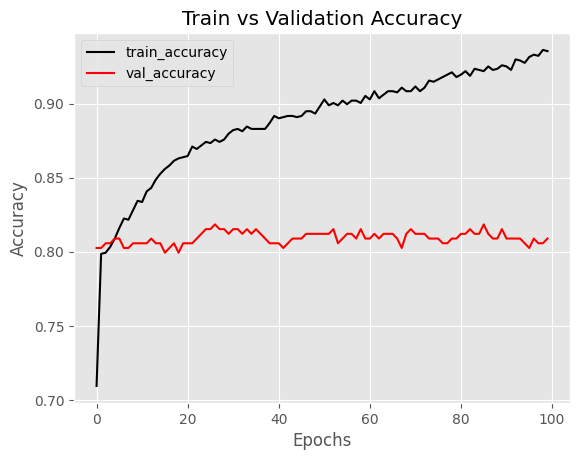

In [16]:
# Accuracy visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(np.arange(0,100),hist.history['accuracy'],label='train_accuracy',color='black')
plt.plot(np.arange(0,100),hist.history['val_accuracy'],label='val_accuracy',color='red')
plt.title("Train vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

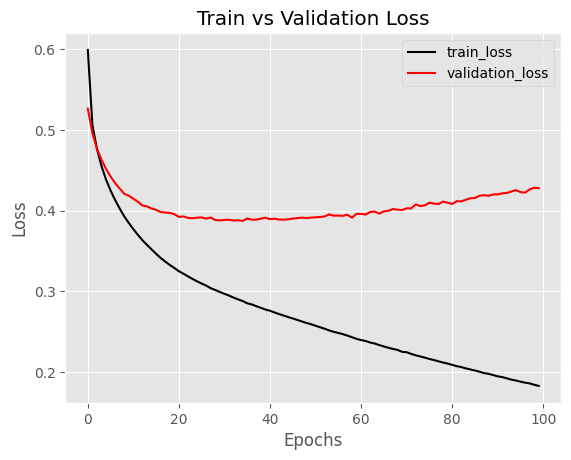

In [17]:
# Loss visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(np.arange(0,100),hist.history['loss'],label='train_loss',color='black')
plt.plot(np.arange(0,100),hist.history['val_loss'],label='validation_loss',color='red')
plt.title("Train vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()